In [7]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

### Trajectory Generation using Cubic Polynomial

In [13]:
t0,tf,q0,qf,q0dot,qfdot = sp.symbols("t0,tf,q0,qf,q0dot,qfdot")
A = sp.Matrix([[1,t0,t0**2,t0**3],
               [1,tf,tf**2,tf**3],
               [0,1,2*t0,3*t0**2],
               [0,1,2*tf,3*tf**2]])
C = sp.Matrix([[q0,qf,q0dot,qfdot]]).T
A_num = sp.lambdify([t0,tf],A)
C_num = sp.lambdify([q0,qf,q0dot,qfdot],C)

B_num = np.linalg.pinv(A_num(1,4))@C_num(1,2,0,0)
B_num

array([[ 1.40740741],
       [-0.88888889],
       [ 0.55555556],
       [-0.07407407]])

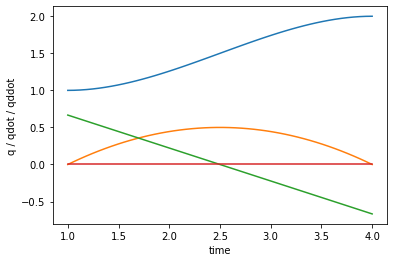

In [9]:
def get_q(t):
    return np.array([[1,t,t**2,t**3]])@B_num
def get_qdot(t):
    return np.array([[0,1,2*t,3*t**2]])@B_num
def get_qddot(t):
    return np.array([[0,0,2,6*t]])@B_num

t = np.linspace(1,4,num=50)

qq = get_q(t)
qqdot = get_qdot(t)
qqddot = get_qddot(t)
plt.plot(t,qq[0][0])
plt.plot(t,qqdot[0][0])
plt.plot(t,qqddot[0][0])
plt.plot(t,[0 for _ in range(len(t))])
plt.xlabel('time')
plt.ylabel('q / qdot / qddot')
plt.show()

### Trajectory Generation via a point.

In [108]:
""" q0 = 0,   q0dot = 0,   t = 0 Start Point
    q1 = 0.5, q1dot = 0.2, t = 1 Via Point
    qf = 1,   qfdot = 0,   t = 2 End Point
"""
B_num1 = np.linalg.pinv(A_num(t0=0,tf=1))@C_num(q0=0,  qf=1,q0dot=0,  qfdot=0.3)
B_num2 = np.linalg.pinv(A_num(t0=1,tf=2))@C_num(q0=1, qf=2,  q0dot=0.3,qfdot=0)
B_num1

array([[ 4.71844785e-17],
       [ 3.56659147e-16],
       [ 2.70000000e+00],
       [-1.70000000e+00]])

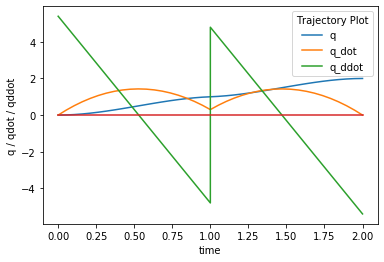

In [109]:
def get_q(t1,t2):
    q1 = (np.array([[1,t1,t1**2,t1**3]])@B_num1).flatten()
    q2 = (np.array([[1,t2,t2**2,t2**3]])@B_num2 ).flatten()
    
    return np.concatenate((q1[0],q2[0]))

def get_qdot(t1,t2):
    q1 = (np.array([[0,1,2*t1,3*t1**2]])@B_num1).flatten()
    q2 = (np.array([[0,1,2*t2,3*t2**2]])@B_num2).flatten()
    return np.concatenate((q1[0],q2[0]))

def get_qddot(t1,t2):
    q1 = (np.array([[0,0,2,6*t1]])@B_num1).flatten()
    q2 = (np.array([[0,0,2,6*t2]])@B_num2).flatten()
    return np.concatenate((q1[0],q2[0]))
    
t1 = np.linspace(0,1,num=20)
t2 = np.linspace(1,2,num=20)
t = np.append(t1,t2)

qq = get_q(t1,t2)
qqdot = get_qdot(t1,t2)
qqddot = get_qddot(t1,t2)

plt.plot(t,qq, label='q')
plt.plot(t,qqdot, label='q_dot')
plt.plot(t,qqddot, label='q_ddot')
plt.plot(t,[0 for _ in range(len(t))])
plt.xlabel('time')
plt.ylabel('q / qdot / qddot')
plt.legend(title='Trajectory Plot')
plt.show()